In [261]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [262]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn import metrics
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [263]:
# Loadind data
df = pd.read_csv(r"C:\Users\Rohit Phougat\Desktop\Projects\customer_churn_prediction\WA_Fn-UseC_-Telco-Customer-Churn.xls")

In [264]:
# Understanding the Data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [265]:
df.shape

(7043, 21)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [267]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [268]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<Axes: >

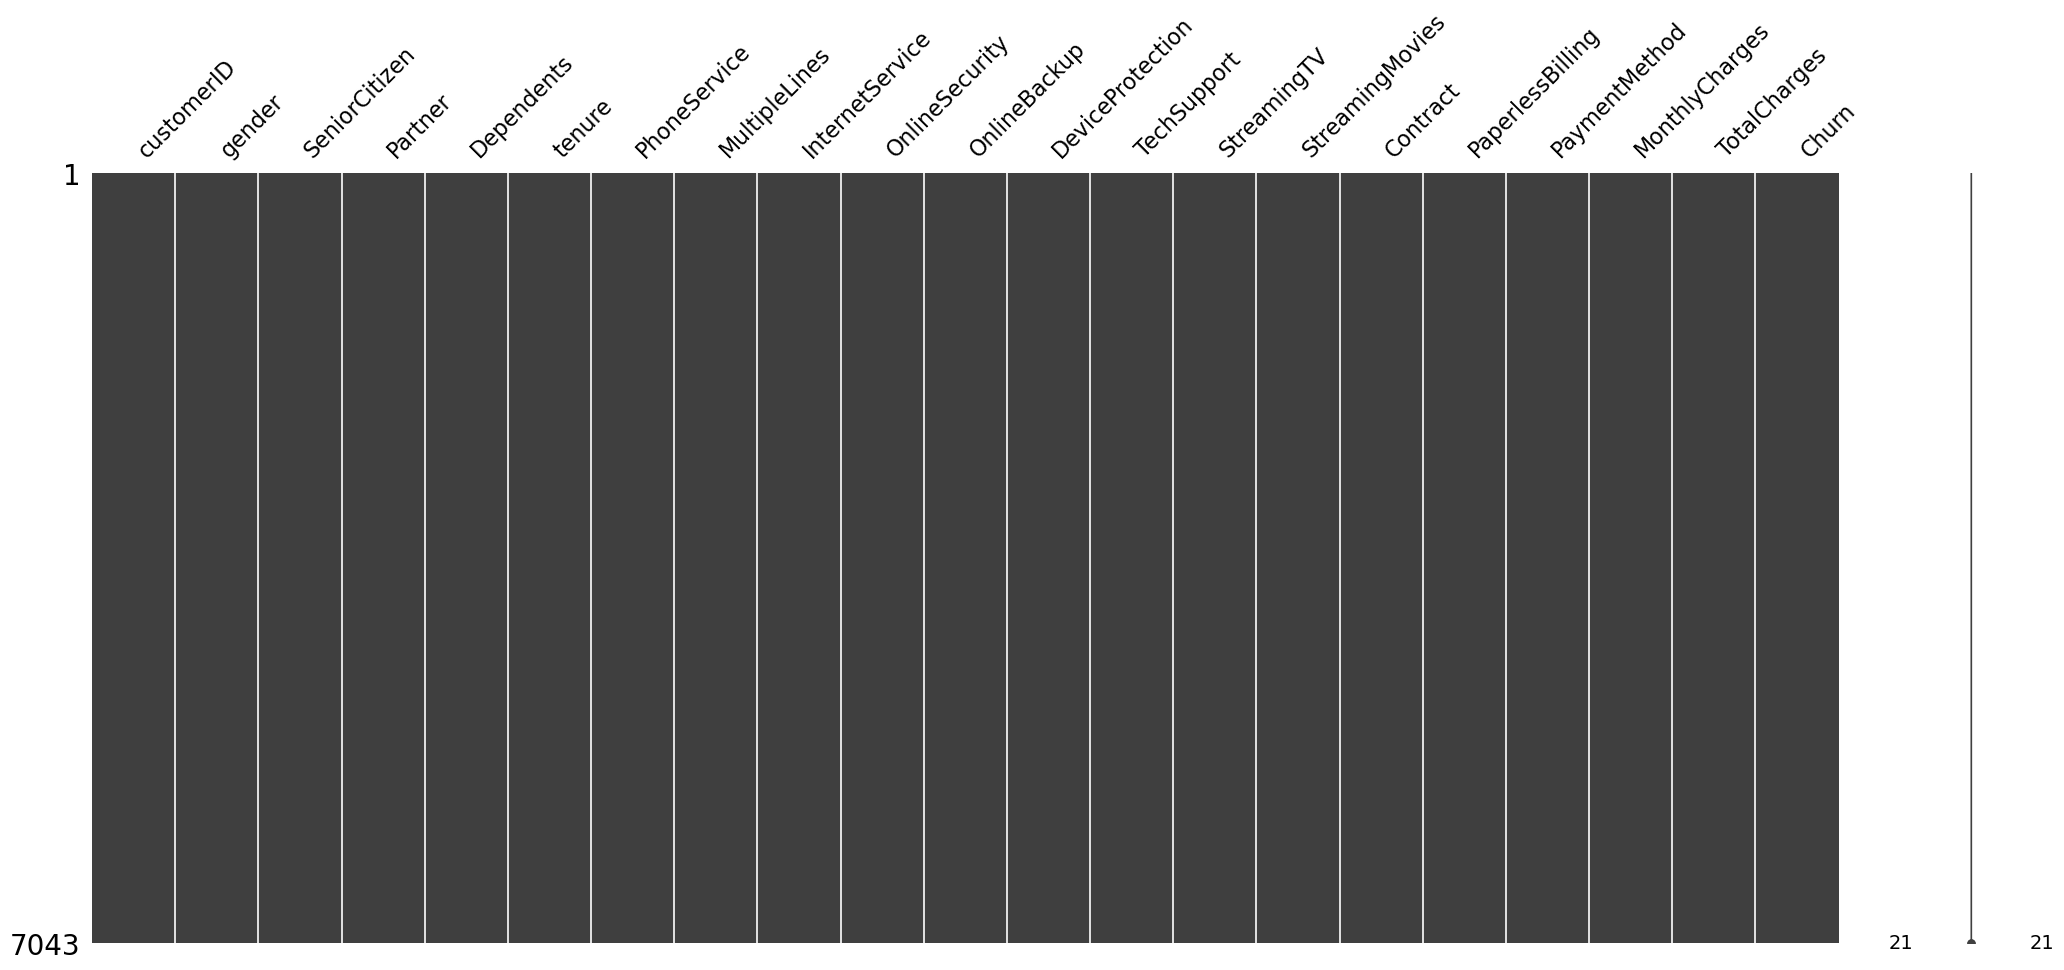

In [269]:
# Visualizing missing values as matrix
msno.matrix(df)

No peculiar pattern means no missing data

In [270]:
# Data Manipulation
df = df.drop(['customerID'], axis=1)

In [271]:
df.head(

)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [272]:
# Check for missingness further that can be found in form of blankspaces
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [273]:
# As we can see there are 11 rows that have null values lets explore further
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [274]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [275]:
# There are no more rows with tenure equals to zero and the number is small so we can drop these rows and proceed further as it will not affect that much
df.drop(labels=df[df['tenure']==0].index, axis=0, inplace=True)

In [276]:
df[df['tenure']==0].index

Index([], dtype='int64')

In [277]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [278]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [279]:
# The column senior citizen should have a boolean value i.e., Yes or No but it have a integer value lets solve this problem
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [280]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [281]:
# There are not too many columns so we will explore each one by one with respect to its relationship with Churn

In [282]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

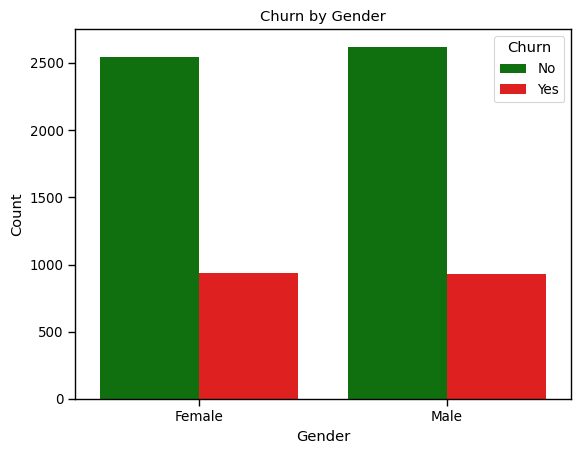

In [283]:
# Plot grouped bar chart
sns.countplot(data=df, x='gender', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [284]:
# As we can see there is little to no effect of gender on churn rate 

In [285]:
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

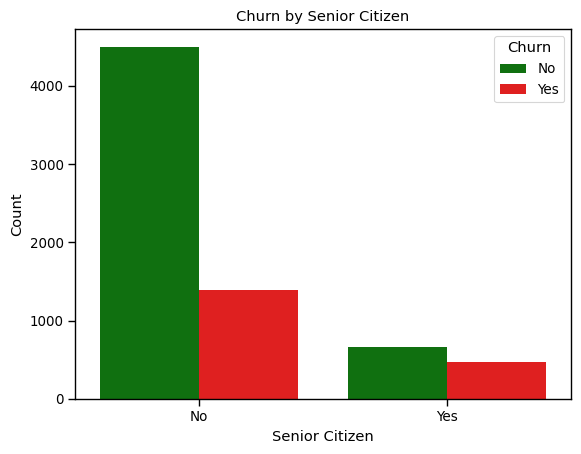

In [286]:
# Plot grouped bar chart
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [287]:
# It can be seen easily that fraction of senior citizen is very less but most of senior citizen churns

In [288]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

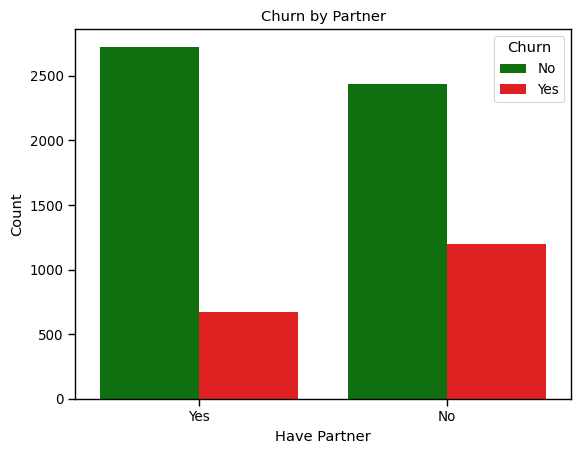

In [289]:
# Plot grouped bar chart
sns.countplot(data=df, x='Partner', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Partner")
plt.xlabel("Have Partner")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [290]:
# It can be seen that those who do not have partner have high chances of churning out

In [291]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

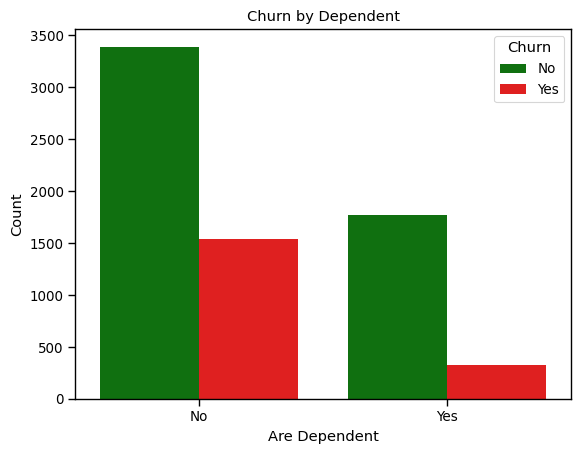

In [292]:
# Plot grouped bar chart
sns.countplot(data=df, x='Dependents', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Dependent")
plt.xlabel("Are Dependent")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [293]:
# Those who are not dependent have high chances of churning out

In [294]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

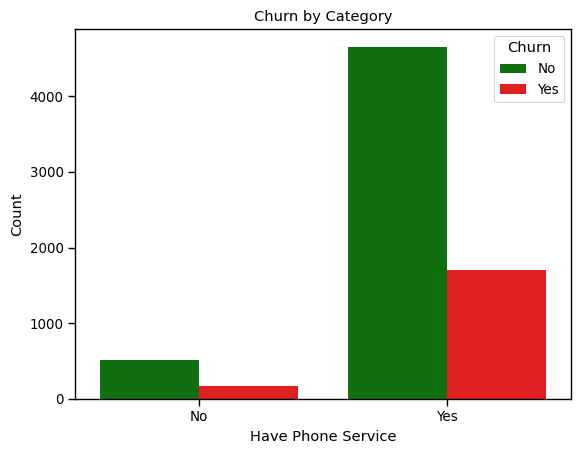

In [295]:
# Plot grouped bar chart
sns.countplot(data=df, x='PhoneService', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Have Phone Service")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [296]:
# Very small fraction does not have phone service out of that 1/3rd are likely to churn

In [297]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

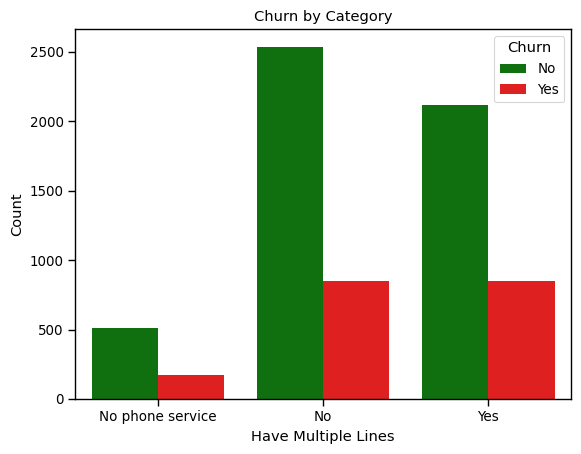

In [298]:
# Plot grouped bar chart
sns.countplot(data=df, x='MultipleLines', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Have Multiple Lines")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [299]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

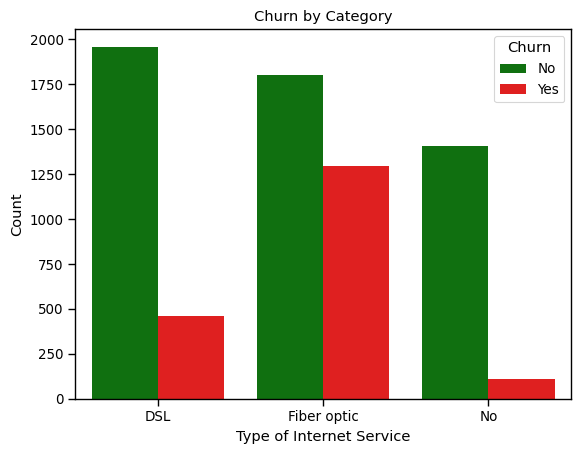

In [300]:
# Plot grouped bar chart
sns.countplot(data=df, x='InternetService', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Type of Internet Service")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [301]:
# we can see clearly that their is a problem with fibre optic as most people from fibre optic churn out as compared to dsl connection

In [302]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

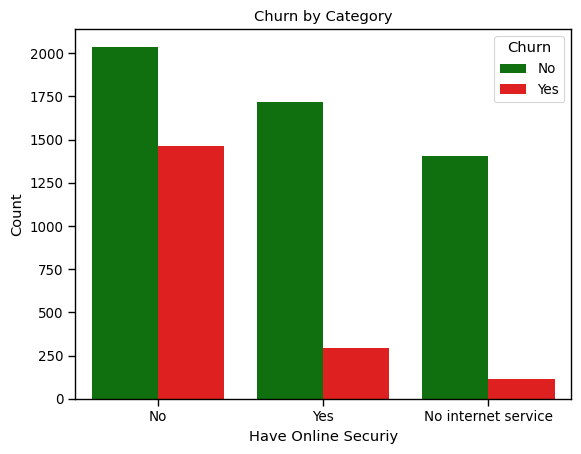

In [303]:
# Plot grouped bar chart
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Have Online Securiy")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [304]:
# Customers with no online security are more likely to churn as compared to customers with online security

In [305]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

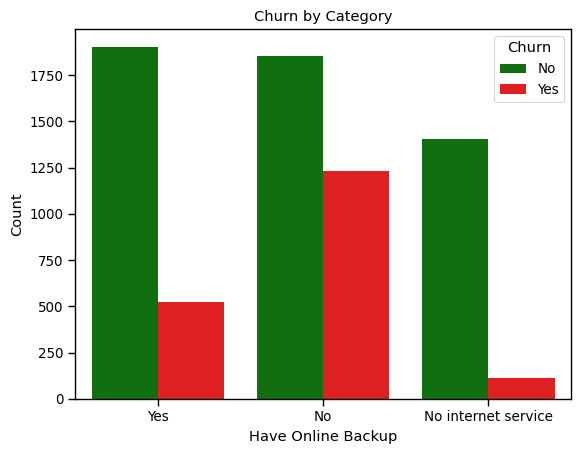

In [306]:
# Plot grouped bar chart
sns.countplot(data=df, x='OnlineBackup', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Have Online Backup")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [307]:
# People having no online backup are more likely to churn

In [308]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

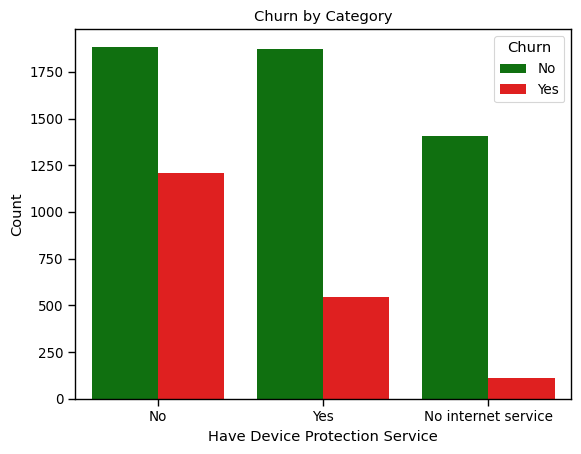

In [309]:
# Plot grouped bar chart
sns.countplot(data=df, x='DeviceProtection', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Have Device Protection Service")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [310]:
# Customers with no device protection service are more likely to churn

In [311]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

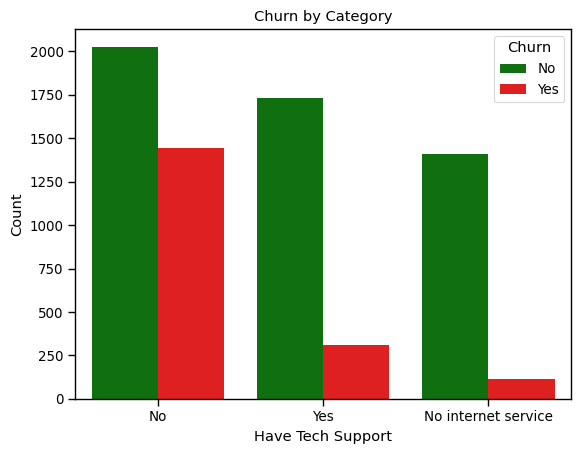

In [312]:
# Plot grouped bar chart
sns.countplot(data=df, x='TechSupport', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Have Tech Support")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [313]:
# With no tech support more likely to churn

In [314]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

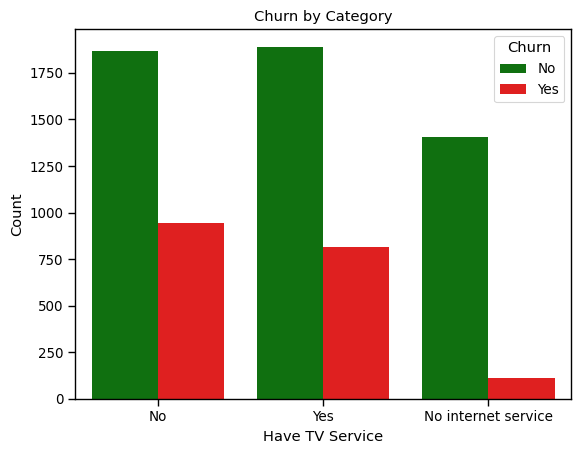

In [315]:
# Plot grouped bar chart
sns.countplot(data=df, x='StreamingTV', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Have TV Service")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [316]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

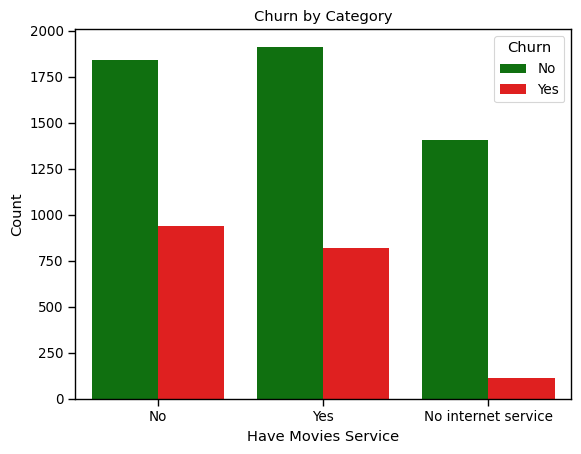

In [317]:
# Plot grouped bar chart
sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Have Movies Service")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [318]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

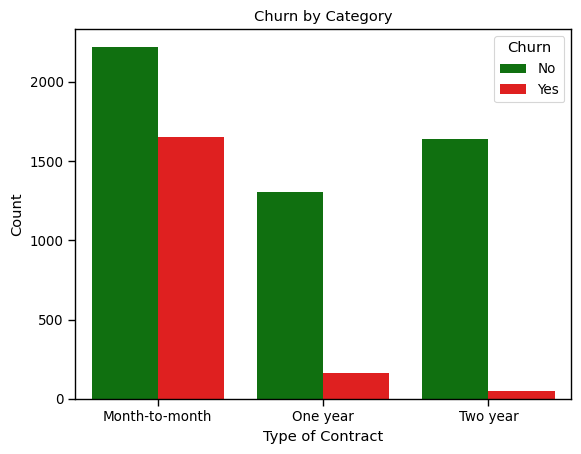

In [319]:
# Plot grouped bar chart
sns.countplot(data=df, x='Contract', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Type of Contract")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [320]:
# Having monthly services are more likely to churn

In [321]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

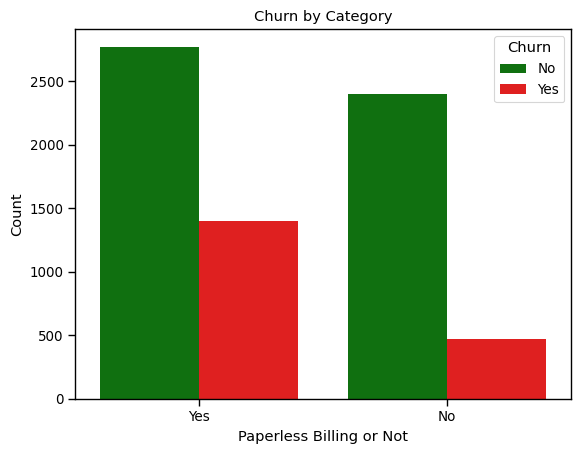

In [322]:
# Plot grouped bar chart
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Paperless Billing or Not")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [323]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

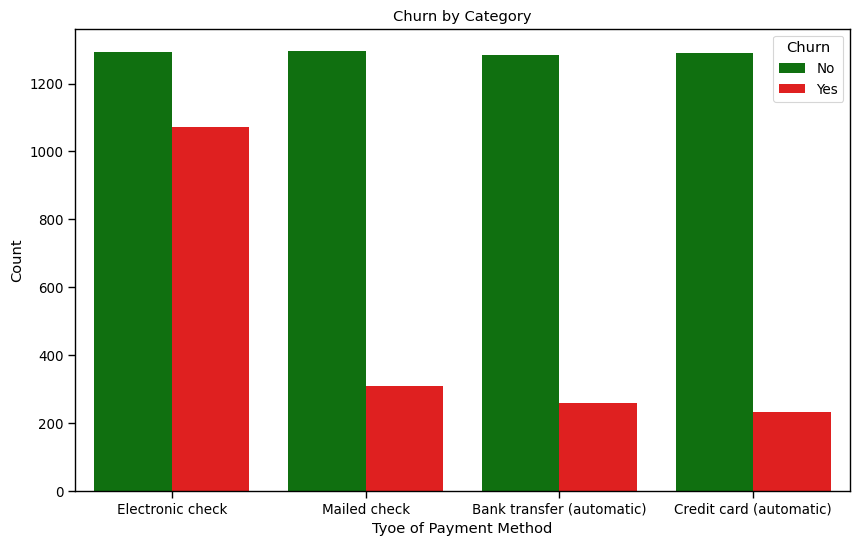

In [324]:
# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette={'No': 'green', 'Yes': 'red'})
plt.title("Churn by Category")
plt.xlabel("Tyoe of Payment Method")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [325]:
# Customers with electronic checks are more likely to churn

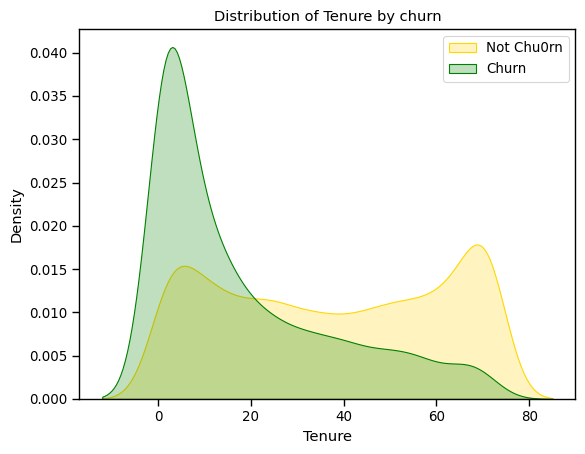

In [326]:
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of Tenure by churn');

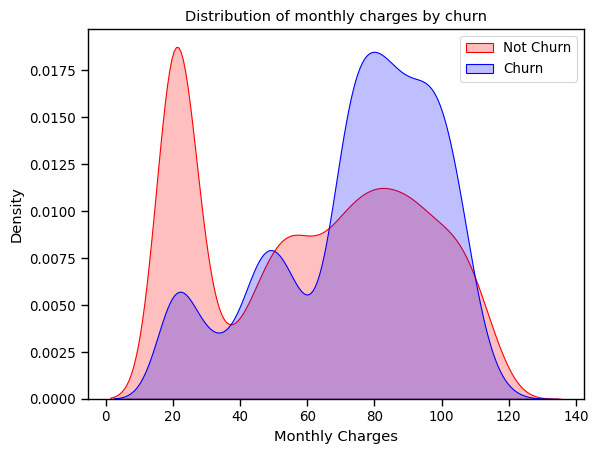

In [327]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

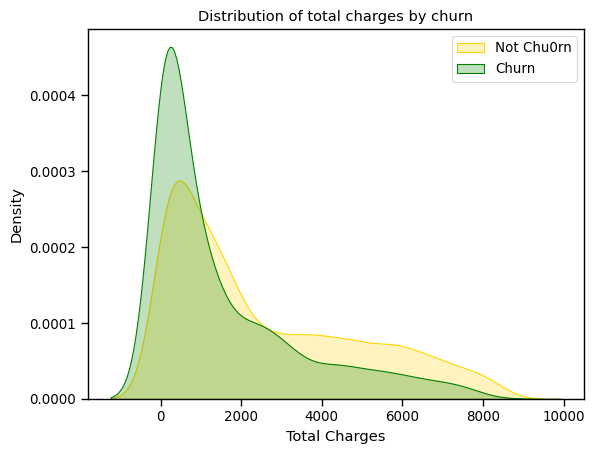

In [328]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

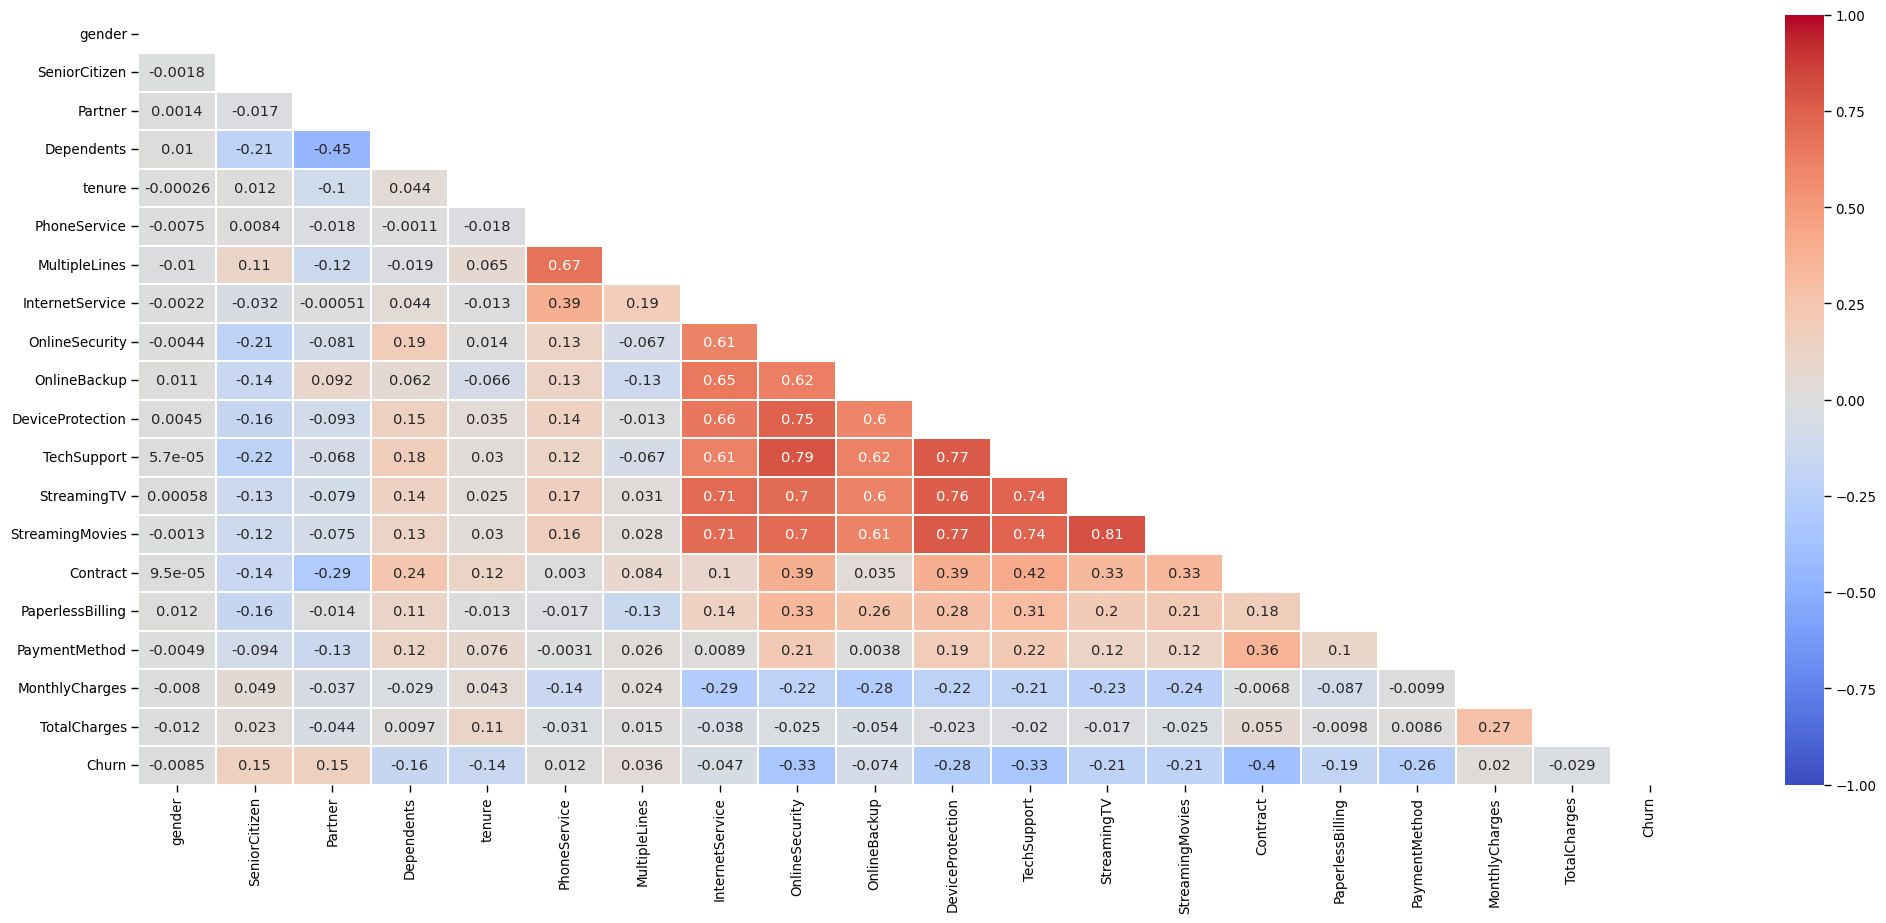

In [329]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(
    corr, 
    mask=mask, 
    xticklabels=corr.columns, 
    yticklabels=corr.columns, 
    annot= True,
    linewidths=.2, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1)

In [330]:
# Splitting Data into train and test datasets

x = df.drop('Churn', axis=1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Display the sizes of the train and test sets
print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 5625
Test set size: 1407


In [331]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [332]:
# Encoding data based on feature type and feature data type
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
cols_ohe = ["InternetService", "Contract", "PaymentMethod"]
cols_le = list(set(x_train.columns) - set(num_cols) - set(cols_ohe))

In [333]:
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.fit_transform(x_test[num_cols])

In [334]:
le = LabelEncoder()
for col in cols_le:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

In [335]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder and fit-transform on x_train
ohe = OneHotEncoder(sparse_output=False)  # Use sparse=False to get a dense array

# Transform x_train
ohe_train = ohe.fit_transform(x_train[cols_ohe])
ohe_train_df = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cols_ohe))
x_train = x_train.drop(columns=cols_ohe).reset_index(drop=True)
x_train = pd.concat([x_train, ohe_train_df], axis=1)

# Transform x_test
ohe_test = ohe.transform(x_test[cols_ohe])
ohe_test_df = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cols_ohe))
x_test = x_test.drop(columns=cols_ohe).reset_index(drop=True)
x_test = pd.concat([x_test, ohe_test_df], axis=1)


In [336]:
# Checking if everything is encoded perfectly or not
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,1.321816,1,2,2,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,0,0,0,-0.267410,0,1,0,0,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,0,1.444064,1,2,0,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,0,0,0,-1.204646,1,0,0,2,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,1,0,0.669826,0,1,2,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Let's train our models now and see which performs better for this particular problem

In [337]:
# Let's start with knn model
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
predicted_y_knn = knn.predict(x_test)
accuracy_knn = knn.score(x_test, y_test)
print("KNN Accuracy : ", accuracy_knn)

KNN Accuracy :  0.7683013503909026


In [338]:
print(classification_report(y_test, predicted_y_knn))

              precision    recall  f1-score   support

          No       0.84      0.85      0.84      1033
         Yes       0.57      0.54      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.77      0.77      1407



In [339]:
# SVC Model
svc = SVC(random_state=1)
svc.fit(x_train, y_train)
predicted_y_svc = svc.predict(x_test)
accuracy_svc = svc.score(x_test, y_test)
print("SVC Accuracy : ", accuracy_svc)

SVC Accuracy :  0.7896233120113717


In [340]:
print(classification_report(y_test, predicted_y_svc))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1033
         Yes       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [341]:
# Random Forest Model

rf = RandomForestClassifier(
    n_estimators=500 , 
    oob_score = True, 
    n_jobs = -1,
    random_state =50, 
    max_features = "sqrt",
    max_leaf_nodes = 30)
rf.fit(x_train, y_train)

# Make predictions
prediction_y_rf = rf.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_y_rf))

0.7924662402274343


In [342]:
print(classification_report(y_test, prediction_y_rf))

              precision    recall  f1-score   support

          No       0.82      0.91      0.87      1033
         Yes       0.66      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



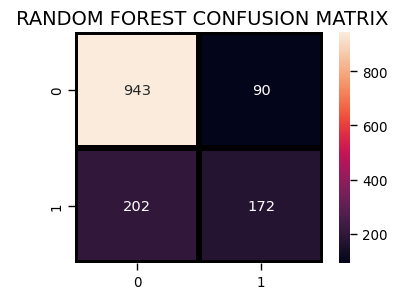

In [343]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_y_rf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

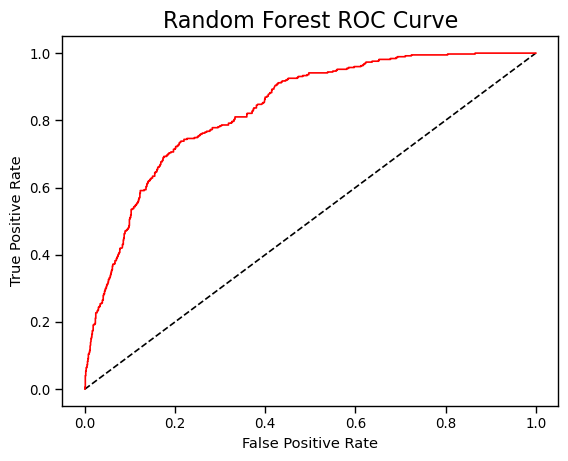

In [344]:
y_rfpred_prob = rf.predict_proba(x_test)[:,1]
y_test_numeric = y_test.replace({'No': 0, 'Yes': 1})
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_numeric, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [345]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predicted_y_lr = lr.predict(x_test)
accuracy_lr = lr.score(x_test, y_test)
print("Logistic Regression Accuracy : ", accuracy_lr)

Logistic Regression Accuracy :  0.8024164889836531


In [346]:
print(classification_report(y_test, predicted_y_lr))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1033
         Yes       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



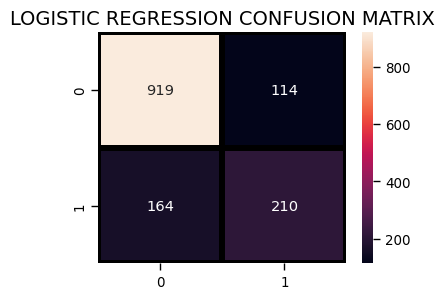

In [347]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y_lr),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

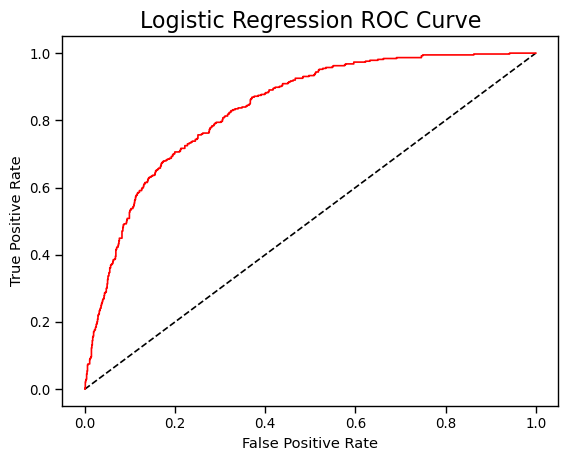

In [348]:
y_pred_prob = lr.predict_proba(x_test)[:,1]
y_test_numeric = y_test.replace({'No': 0, 'Yes': 1})
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [349]:
# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predicted_y_dt = dt.predict(x_test)
accuracy_dt = dt.score(x_test, y_test)
print("Decision Tree Accuracy : ", accuracy_dt)

Decision Tree Accuracy :  0.7263681592039801


In [350]:
print(classification_report(y_test, predicted_y_dt))

              precision    recall  f1-score   support

          No       0.81      0.83      0.82      1033
         Yes       0.48      0.45      0.47       374

    accuracy                           0.73      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.73      0.72      1407



In [351]:
# ADA Boost Classifier
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)
predicted_y_ad = ad.predict(x_test)
accuracy_ad = ad.score(x_test, y_test)
print("ADA Boost Accuracy : ", accuracy_ad)

ADA Boost Accuracy :  0.7846481876332623


In [352]:
print(classification_report(y_test, predicted_y_ad))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1033
         Yes       0.63      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



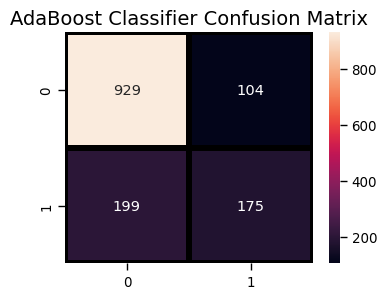

In [353]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y_ad),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

In [354]:
# Gradient Boost Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predicted_y_gb = gb.predict(x_test)
accuracy_gb = gb.score(x_test, y_test)
print("Gradient Boosting Classifier : ", accuracy_gb)

Gradient Boosting Classifier :  0.7960199004975125


In [355]:
print(classification_report(y_test, predicted_y_gb))

              precision    recall  f1-score   support

          No       0.83      0.90      0.87      1033
         Yes       0.65      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.80      0.79      1407



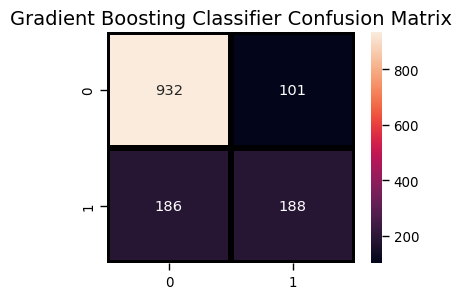

In [356]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y_gb),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

Voting Classifier

Let's now predict the final model based on the highest majority of voting and check it's score.


In [357]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(x_train, y_train)
predictions_y_vr = eclf1.predict(x_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions_y_vr))

Final Accuracy Score 
0.7995735607675906


In [358]:
print(classification_report(y_test, predictions_y_vr))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1033
         Yes       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



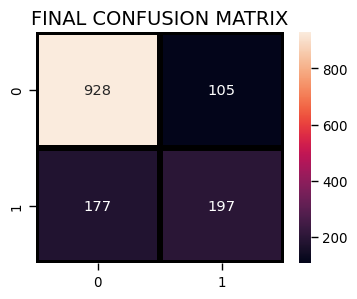

In [359]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions_y_vr),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()



From the confusion matrix we can see that: There are total 928+105=1033 actual non-churn values and the algorithm predicts 928 of them as non churn and 105 of them as churn. While there are 177+197=374 actual churn values and the algorithm predicts 177 of them as non churn values and 197 of them as churn values.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.
